# <center><font color = "blue"> Microsoft Stock Price Prediction</font> </center>

## Importing Libraries

In [174]:
from dateutil.parser import parse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import plotly 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import itertools
from pmdarima.arima import auto_arima
from matplotlib import rcParams
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Reading and Understanding the data

In [175]:
#Reading the data and assigning the date column as index
df = pd.read_csv("MSFT.csv",parse_dates=['Date'], index_col='Date')
#Checking the first five records
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,164.350006,165.570007,162.300003,165.509995,162.521194,41905300
2020-04-14,169.000000,173.750000,168.000000,173.699997,170.563293,52874300
2020-04-15,171.199997,173.570007,169.240005,171.880005,168.776184,40940800
2020-04-16,174.300003,177.279999,172.899994,177.039993,173.842987,50479600
2020-04-17,179.500000,180.000000,175.869995,178.600006,175.374817,52765600


In [176]:
#Checking the number of records and attributes
df.shape

(505, 6)

In [177]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-04-13 to 2022-04-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       505 non-null    float64
 1   High       505 non-null    float64
 2   Low        505 non-null    float64
 3   Close      505 non-null    float64
 4   Adj Close  505 non-null    float64
 5   Volume     505 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [178]:
#Checking the description of attributes
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,253.042277,255.560040,250.388158,253.124594,251.269551,3.015815e+07
std,47.397656,47.593557,46.981026,47.319429,48.166494,1.070028e+07
min,164.350006,165.570007,162.300003,165.509995,162.521194,1.055060e+07
25%,213.520004,215.289993,210.929993,213.250000,210.447159,2.284310e+07
50%,245.220001,246.600006,243.000000,245.710007,244.240555,2.810730e+07
75%,296.220001,298.720001,293.489990,296.029999,295.419159,3.462020e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,9.042890e+07


## Checking correlation

<AxesSubplot:title={'center':'Correlation Among Variables'}>

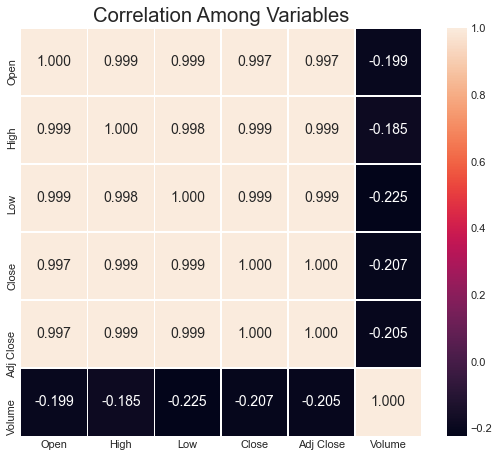

In [179]:
#Obtaining the correlation and displaying it using a heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(8,7))
plt.title("Correlation Among Variables")
autoDataColumns = ['Open','High','Low','Close','Adj Close','Volume']
sns.heatmap(df[autoDataColumns].corr(), annot=True, fmt='.3f', linewidths=.6)

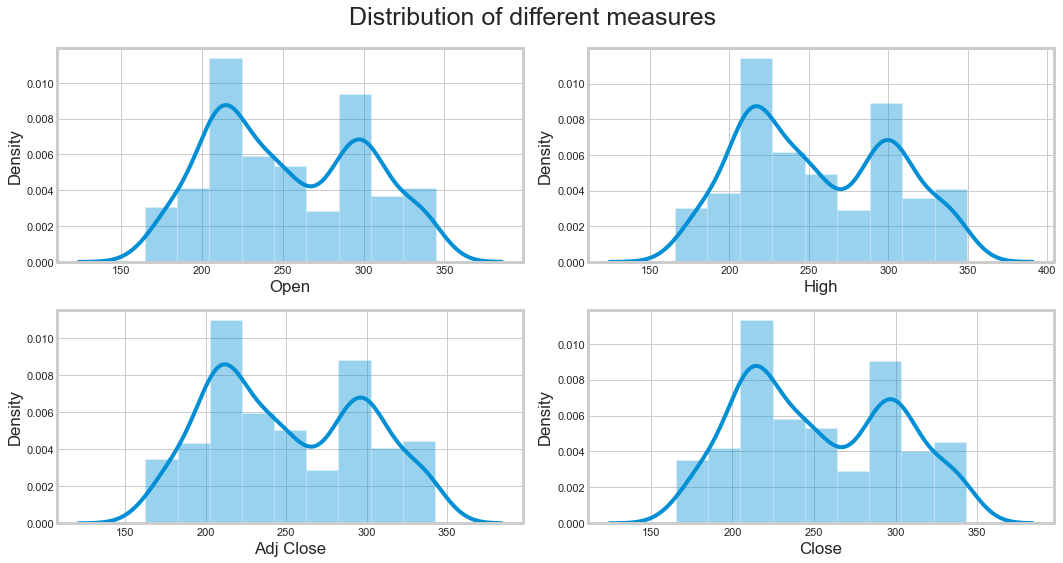

In [180]:
#Size and style of the plot
plt.figure(figsize = (15, 8))


#Subplots of distplot

plt.subplot(221)
sns.distplot(df['Open'])
fig = plt.gcf()


plt.subplot(222)
sns.distplot(df['High'])
fig = plt.gcf()

plt.subplot(223)
sns.distplot(df['Adj Close'])
fig = plt.gcf()

plt.subplot(224)
sns.distplot(df['Close'])
fig = plt.gcf()

plt.suptitle( "Distribution of different measures",fontsize = 25)
fig.tight_layout()
plt.show()


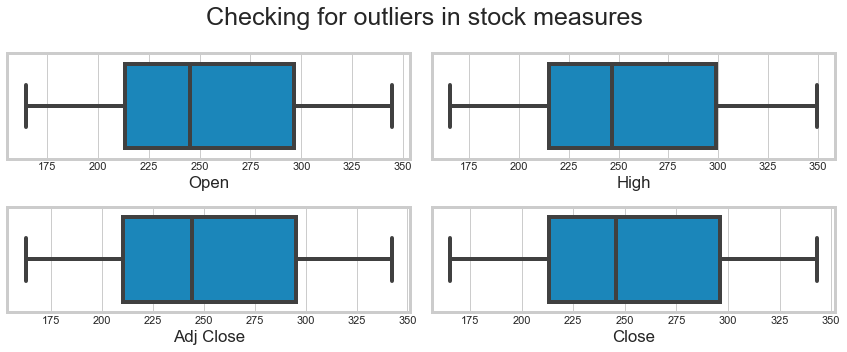

In [181]:
#Size and style of the plot
plt.figure(figsize = (12, 5))


#Subplots of boxplot

plt.subplot(221)
sns.boxplot(df['Open'])
fig = plt.gcf()


plt.subplot(222)
sns.boxplot(df['High'])
fig = plt.gcf()

plt.subplot(223)
sns.boxplot(df['Adj Close'])
fig = plt.gcf()

plt.subplot(224)
sns.boxplot(df['Close'])
fig = plt.gcf()

plt.suptitle( "Checking for outliers in stock measures",fontsize = 25)
fig.tight_layout()
plt.show()


In [182]:
import plotly.express as px
figure = px.line(df, x = df.index, y = "Adj Close", title = "Microsoft Stock Price- Interactive Graph")
figure.show()



Text(0.5, 1.0, 'Volume of Stock Traded Per Day')

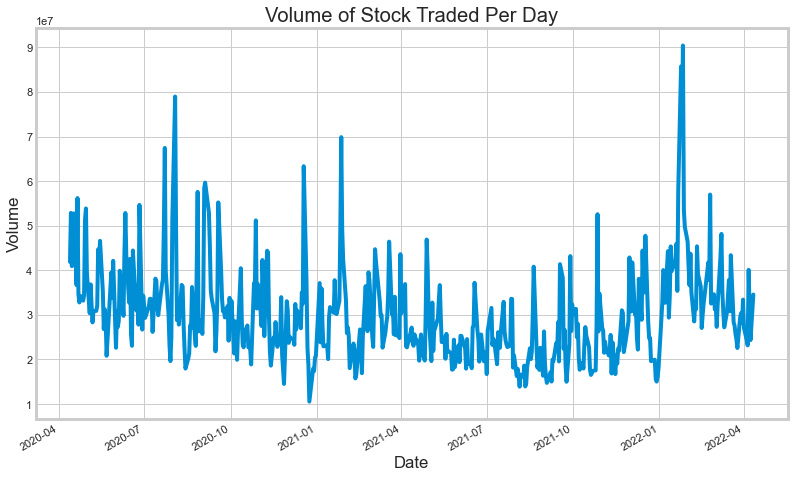

In [183]:
# Plotting the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
df['Volume'].plot()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Volume of Stock Traded Per Day")

## Linear Regression Model 

In [184]:
# Converting the Date to ordinal
df['ordinal'] = df.index.map(pd.Timestamp.toordinal)

In [185]:

import statsmodels.api as sm

# extract x and y from dataframe data
x = df[['ordinal']]
y = df[['Adj Close']]

x = sm.add_constant(x) # adding a constant
#Training the model
model = sm.OLS(y[:len(df)-20], x[:len(df)-20]).fit()
# Predicting the values
y_pred_test = model.predict(x[len(df)-20:]) 
y_pred_train = model.predict(x[:len(df)-20])
#Printing the summary
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     4208.
Date:                Sun, 01 May 2022   Prob (F-statistic):          1.39e-240
Time:                        16:27:36   Log-Likelihood:                -2013.4
No. Observations:                 485   AIC:                             4031.
Df Residuals:                     483   BIC:                             4039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.649e+05   2545.864    -64.772      0.0

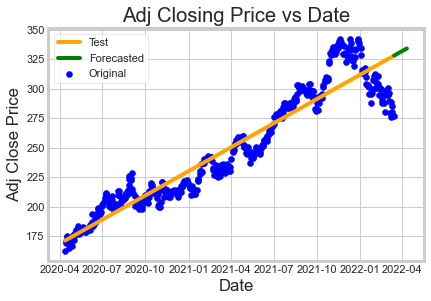

In [186]:
#Plotting the model
fig, ax = plt.subplots()
plt.scatter(x[:len(df)-20].index,y[:len(df)-20], color = "blue",label='Original')
plt.plot(x[:len(df)-20].index, y_pred_train, color = "orange",label='Test')
plt.plot(x[len(df)-20:].index, y_pred_test, color = "green",label='Forecasted')
plt.title("Adj Closing Price vs Date")
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
leg = ax.legend()
plt.show()

In [187]:
# Printing mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error(y[len(df)-20:],  y_pred_test) 

860.3313256064706

## Evaluating the time series data

<Figure size 432x288 with 0 Axes>

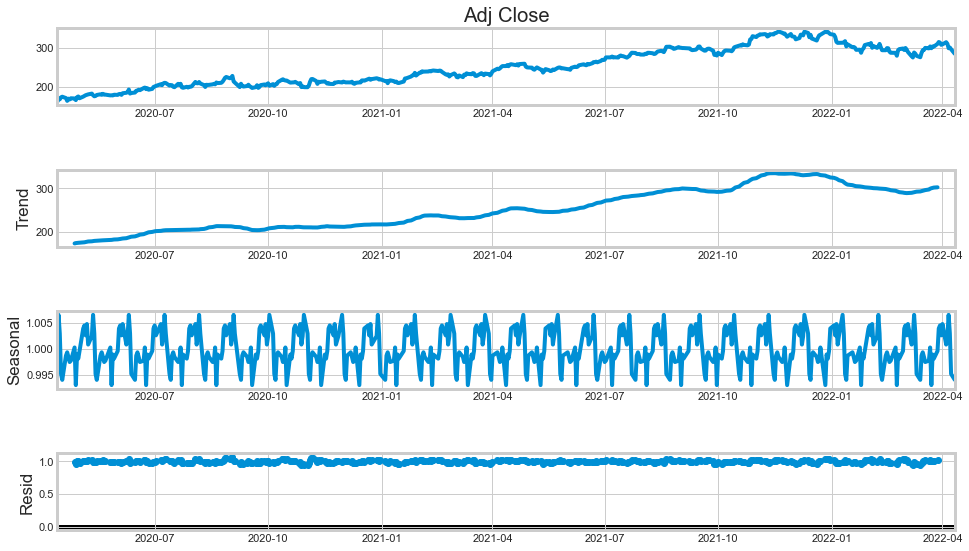

In [188]:
#To understand the trend and the seasonality from a time series, we can decompose the series 
result = seasonal_decompose(df['Adj Close'], model='multiplicative', freq = 20)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

ADF Test:
Null Hypothesis: Series is not Stationary
ADF Statistic: -1.552750
p-value: 0.507274
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
KPSS Test:
Null Hypothesis: Series is Stationary
KPSS Statistic: 2.588140
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


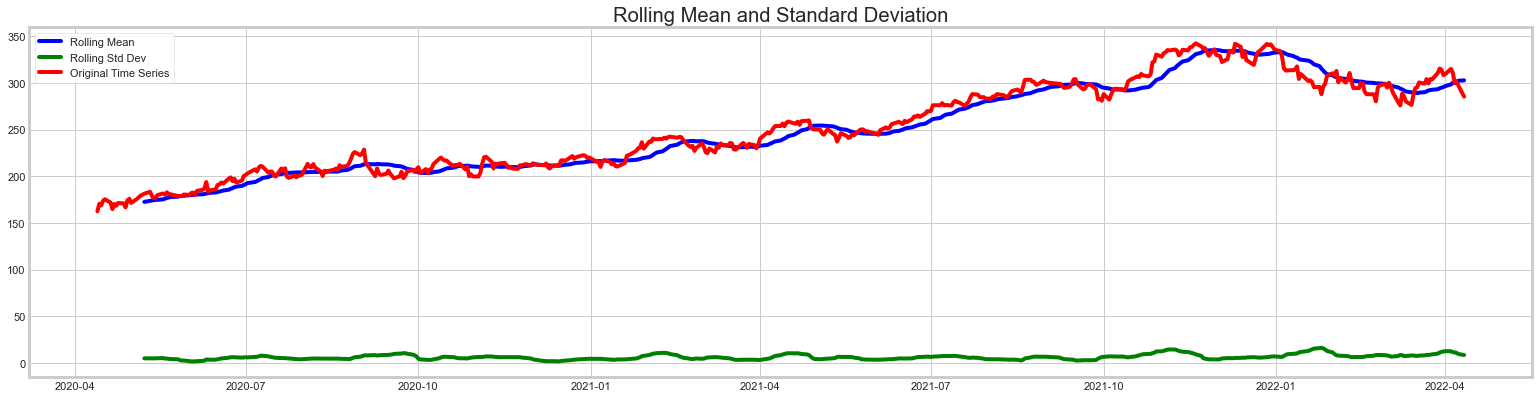

In [189]:

#Checking for stationarity using ADF and KPSS Test

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    roll_20_mean = stock_close_price.rolling(20).mean()
    roll_20_std_dev = stock_close_price.rolling(20).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(roll_20_mean, color='blue', label='Rolling Mean')
    plt.plot(roll_20_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(stock_close_price, color='red',label='Original Time Series')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Series is not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Series is Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(df['Adj Close'])

In [190]:
# Taking the first order difference
df['Adj_Close_first_diff'] = df['Adj Close'] - df['Adj Close'].shift(1)
df=df.dropna()

In [191]:

#Testing for stationarity using ADF and KPSS Tests.

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    roll_20_mean = stock_close_price.rolling(30).mean()
    roll_20_std_dev = stock_close_price.rolling(30).std()

# ADF Test
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Series is not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))
# KPSS Test
    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Series is stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(df['Adj_Close_first_diff'])

ADF Test:
Null Hypothesis: Series is not Stationary
ADF Statistic: -24.142593
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
KPSS Test:
Null Hypothesis: Series is stationary
KPSS Statistic: 0.179081
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


As the p-value for ADF is less than alpha, we reject the null hypothesis and thus series is stationary. Also from KPSS we can infer that the series is stationary

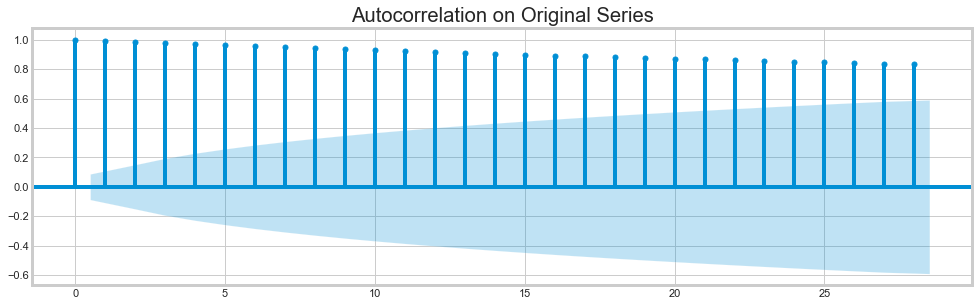

In [192]:
# Check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(15, 15))
ax= fig.add_subplot(311)
fig = plot_acf(df['Adj Close'], ax=ax,title="Autocorrelation on Original Series") 


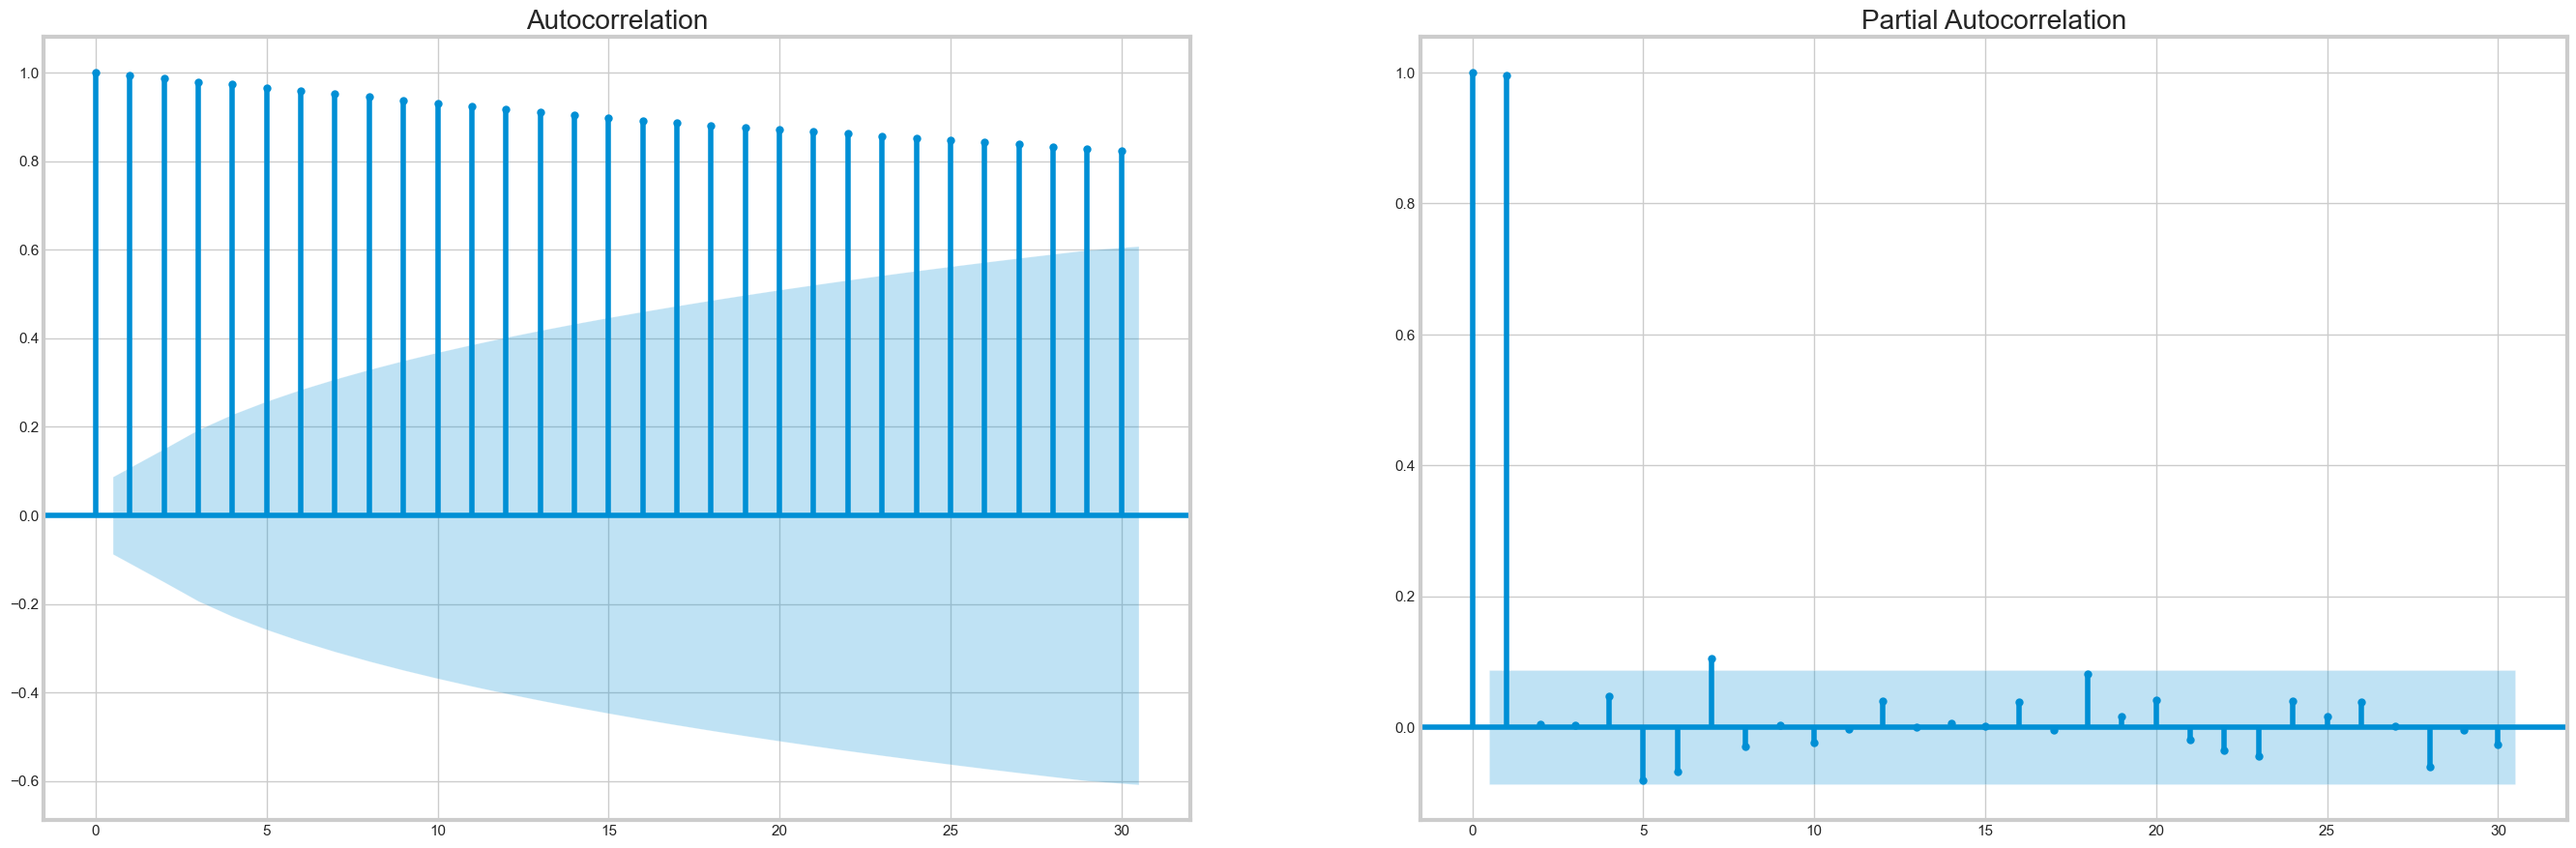

In [193]:
# Plotting the autocorrelation and the partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1,2,figsize=(30,10), dpi= 100)
# lags = 30
plot_acf(df['Adj Close'], lags=30, ax=axes[0])
plot_pacf(df['Adj Close'], lags=30, ax=axes[1])
plt.show()

### White Noise Test

In [194]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df['Adj Close'], lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,499.89338,1.002694e-110


In [195]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df['Adj Close'], lags=[3], return_df=True)

,lb_stat,lb_pvalue
3,1481.802231,0.0


In [196]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(df['Adj Close'], lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,2441.013632,0.0


## ARIMA

In [197]:
# Checking different values for p and q; setting the value od d as 1
p = q = range(0, 6)
d = 1
pdq = list(itertools.product(p, [d], q))

res = []
models = []
for param in pdq:
    _model = ARIMA(df['Adj Close'].values, order=param)

    res.append(_model.fit().aic)
    models.append('ARIMA (' + ' '.join(list(map(str, param)))+')')

      
all_model = pd.DataFrame(list(zip(models, res)), columns=['model', 'AIC'])
all_model.sort_values(by='AIC').reset_index(drop=True)

,model,AIC
0,ARIMA (1 1 0),2860.599405
1,ARIMA (0 1 1),2860.657255
2,ARIMA (0 1 0),2861.694156
3,ARIMA (1 1 1),2862.216220
4,ARIMA (2 1 0),2862.546602
5,ARIMA (0 1 2),2862.620192
6,ARIMA (0 1 3),2863.232371
7,ARIMA (2 1 3),2863.270465
8,ARIMA (3 1 0),2863.289328
9,ARIMA (2 1 1),2864.169106


In [198]:
# Fitting ARIMA on the the top 2 parameters
model_110 = ARIMA(df['Adj Close'].values, order=(1,1,0)).fit()
model_011 = ARIMA(df['Adj Close'].values, order=(0,1,1)).fit()

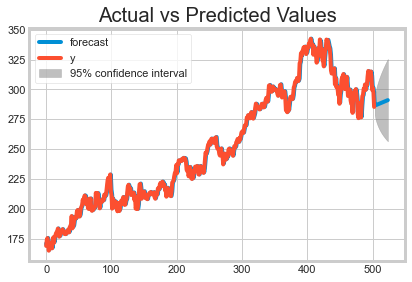

In [199]:
#Predicting for the next 20 days
model_110.plot_predict(1,len(df)+20)
plt.title("Actual vs Predicted Values")
plt.show()

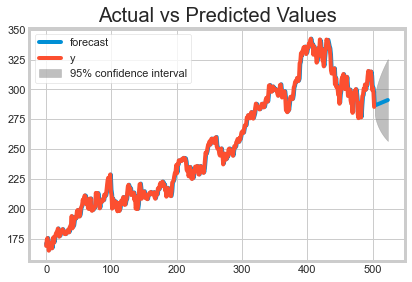

In [200]:
#Predicting for the next 20 days
model_011.plot_predict(1,len(df)+20)
plt.title("Actual vs Predicted Values")
plt.show()

In [201]:
#Predicting for the whole sample
pred_110 = model_110.predict(1,len(df))
pred_011 = model_011.predict(1,len(df))

def rmse(validation, prediction):
    error = validation - prediction
    return np.sqrt(np.mean(error**2))
# In sample RMSE  
print(f"""RMSE
ARIMA 110 : {rmse(df['Adj Close'].values, np.append(df.iloc[-1,:]['Adj Close'], pred_110).cumsum()[1:])}
ARIMA 011 : {rmse(df['Adj Close'].values, np.append(df.iloc[-1,:]['Adj Close'], pred_011).cumsum()[1:])}
""")

RMSE
ARIMA 110 : 92.59890079892861
ARIMA 011 : 92.53165563220666



## Auto ARIMA

In [202]:
# Creating a model using Auto Arima
model_autoARIMA = auto_arima(df['Adj Close'], start_p=0, start_q=0,
test='adf',       
max_p=6, max_q=6, 
m=1,      d=None,    seasonal=False,   
start_P=0, 
D=0, 
trace=True,  error_action='ignore',  
suppress_warnings=True, 
stepwise=True)

#Printing the summary
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2861.694, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2860.599, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2860.657, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2861.215, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2862.547, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2862.216, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2864.169, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2860.404, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2862.302, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2861.921, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2860.479, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2863.901, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.016 seconds
                               SARIMAX Results                                
Dep. Vari

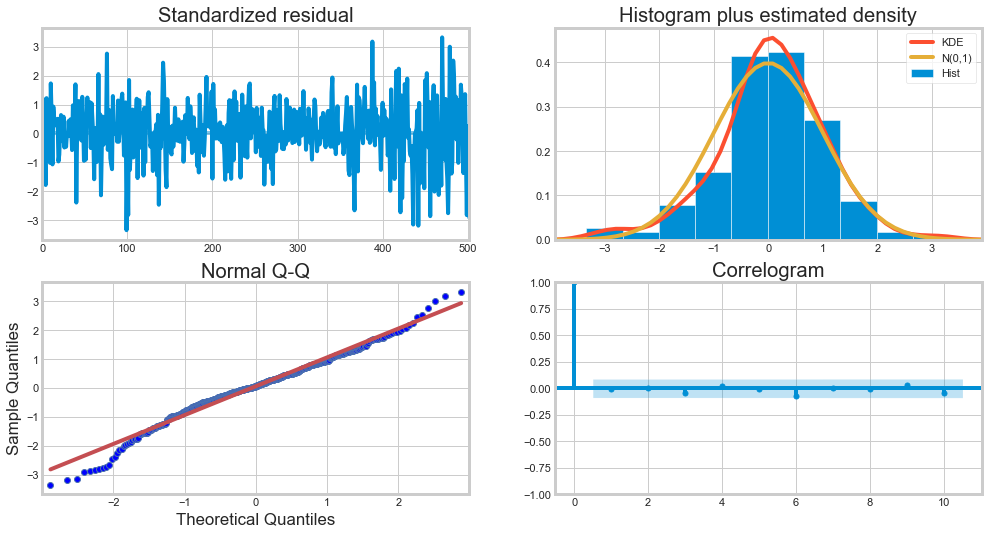

In [203]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

## Simple Exponential Smoothing

In [204]:
# Importing library
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

In [205]:
# Creating a Exponential Smoothing Model
model_se = SimpleExpSmoothing(df['Adj Close'])
model_se._index = pd.to_datetime(df.index)
se_fit = model_se.fit()

In [206]:
se_fit.predict(9)

Date
2020-04-27    171.180936
2020-04-28    170.927141
2020-04-29    167.051415
2020-04-30    173.698005
2020-05-01    175.806334
                 ...    
2022-04-05    314.557833
2022-04-06    311.150643
2022-04-07    300.357327
2022-04-08    301.295477
2022-04-11    297.288297
Length: 495, dtype: float64

In [207]:
from sklearn.metrics import mean_squared_error
# Finding MSE
mean_squared_error(se_fit.predict(0), df['Adj Close']) 

17.098853369965376

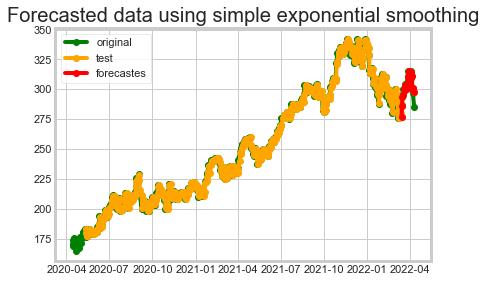

In [208]:
#Visualizing the forecast
fig, ax = plt.subplots()
plt.plot(df['Adj Close'], marker="o", color="green", label = "original")
plt.plot(fit1.predict(20), marker="o", color="orange",  label = "test")
plt.plot(fit1.predict(len(df)-20), marker="o", color="red", label = "forecastes")

plt.title("Forecasted data using simple exponential smoothing")
lex = ax.legend()
plt.show()

## ARIMAX

In [209]:
#Using ARIMAX to forecast data, forecasting values for Adj Close and Open (Multivariate Time Series Modeling)
exo = df[["Adj Close","Open"]]
model_autoARIMA = auto_arima(df['Adj Close'], start_p=1, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,
                      exogenous= exo)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-10668.554, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10672.739, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-10670.452, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-10665.881, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10670.739, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.754 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  504
Model:                        SARIMAX   Log Likelihood                5339.369
Date:                Sun, 01 May 2022   AIC                         -10672.739
Time:                        16:28:14   BIC                         -10660.071
Sample:                             0   HQIC                        -10667.770
                                - 504                             

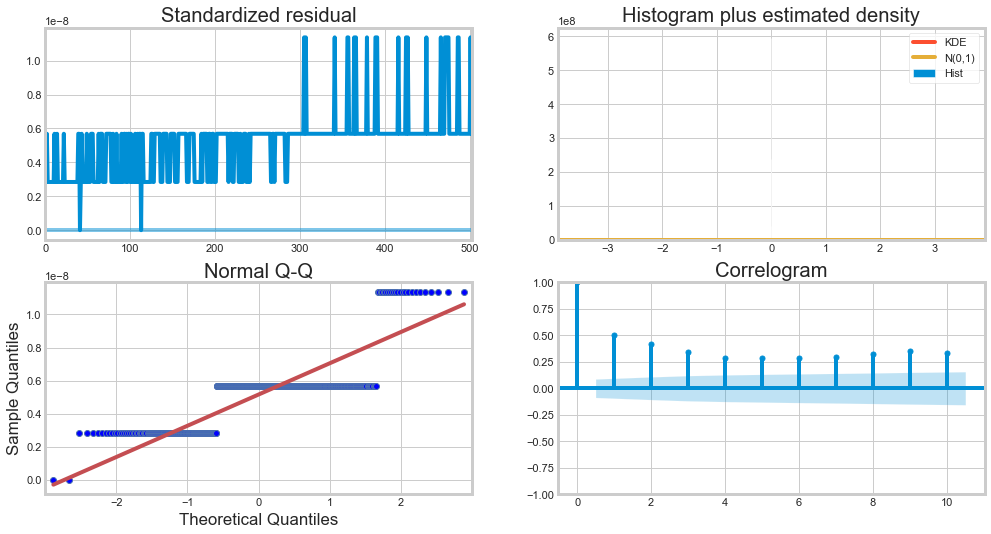

In [210]:
# Model Evaluation
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [211]:
#Selecting values of p,q,d as 1,1,0 respectively from ARIMA
model= ARIMA(df['Adj Close'], 
 exog=exo,
 order=(1,1,0))

In [212]:
#Fitting the model and forecasting the values
results = model.fit()
forecast_1= results.forecast(steps=len(df['Adj Close']), exog=exo)

In [213]:
forecast_1[0]

array([289.81512386, 290.81140097, 293.63932053, 292.88697215,
       291.60631791, 286.59009193, 288.9476704 , 286.70601658,
       289.37725835, 287.19109653, 282.00998087, 286.24965431,
       285.58308493, 284.64866043, 288.97579633, 289.15751511,
       289.58850929, 288.98516813, 288.60655573, 291.92729576,
       287.75617373, 285.12327203, 288.0747411 , 292.01205693,
       291.10229065, 289.69359021, 290.87935341, 289.4027152 ,
       290.14273887, 286.01135751, 288.05516143, 289.19125467,
       290.13329674, 290.86572799, 291.89106251, 292.78587739,
       291.89707572, 296.64893463, 299.27094015, 301.24668282,
       306.78932789, 300.4842173 , 298.06720624, 302.55093645,
       303.32231809, 302.64800929, 304.92188454, 301.65074126,
       306.17442734, 305.84916661, 302.1830255 , 304.54321756,
       301.27363025, 303.81006238, 309.06464329, 310.33750101,
       310.61143131, 311.99533119, 309.51240502, 311.69156152,
       309.20115861, 308.72760071, 301.232999  , 303.03

In [214]:
#Checking the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(forecast_1[0], df['Adj Close']) **0.5

88.26959625466428

In [215]:
df['forecast_1'] = forecast_1[0]

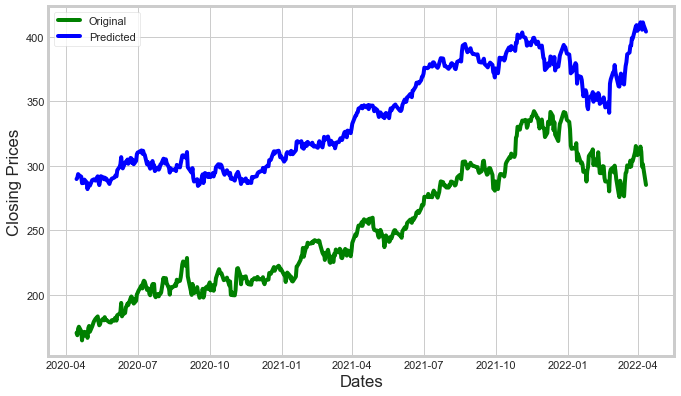

In [216]:
#Visualizing the forecasted data
train_data = df['Adj Close']
test_data = df['forecast_1']
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Original')
plt.plot(test_data, 'blue', label='Predicted')
plt.legend()

In [217]:
results = model.fit()
forecast_1= results.forecast(steps=len(df['Adj Close']), exog=df3)

In [218]:
forecast_1[0]

array([289.81512386, 290.81140097, 293.63932053, 292.88697215,
       291.60631791, 286.59009193, 288.9476704 , 286.70601658,
       289.37725835, 287.19109653, 282.00998087, 286.24965431,
       285.58308493, 284.64866043, 288.97579633, 289.15751511,
       289.58850929, 288.98516813, 288.60655573, 291.92729576,
       287.75617373, 285.12327203, 288.0747411 , 292.01205693,
       291.10229065, 289.69359021, 290.87935341, 289.4027152 ,
       290.14273887, 286.01135751, 288.05516143, 289.19125467,
       290.13329674, 290.86572799, 291.89106251, 292.78587739,
       291.89707572, 296.64893463, 299.27094015, 301.24668282,
       306.78932789, 300.4842173 , 298.06720624, 302.55093645,
       303.32231809, 302.64800929, 304.92188454, 301.65074126,
       306.17442734, 305.84916661, 302.1830255 , 304.54321756,
       301.27363025, 303.81006238, 309.06464329, 310.33750101,
       310.61143131, 311.99533119, 309.51240502, 311.69156152,
       309.20115861, 308.72760071, 301.232999  , 303.03

In [219]:
# Checking the RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(forecast_1[0], df['Adj Close']) **0.5

88.26959625466428

# Holt Winters - Exponential Smmothing

In [220]:
# exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:title={'center':'Holt Winters Exponential Smoothing- Additive and Multiplicative'}, xlabel='Date'>

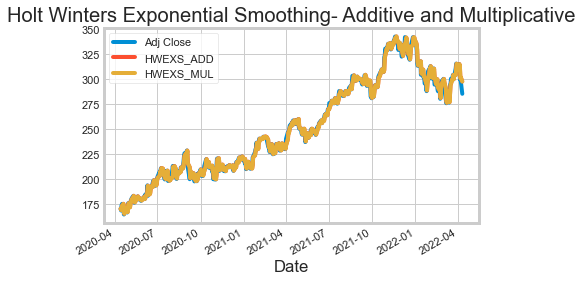

In [221]:
#Setting trend as additive
df['HWEXS_ADD'] = ExponentialSmoothing(df['Adj Close'],trend='add').fit().fittedvalues
#Setting trend as multiplicative
df['HWEXS_MUL'] = ExponentialSmoothing(df['Adj Close'],trend='mul').fit().fittedvalues
df[['Adj Close','HWEXS_ADD','HWEXS_MUL']].plot(title='Holt Winters Exponential Smoothing- Additive and Multiplicative')

In [222]:
# Checking the MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(df['HWEXS_MUL'], df['Adj Close'])

17.06244531199456